## Regresión lineal simple en Python
# Paquete statsmodel para regresión lineal

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
import statsmodels.formula.api as smf

In [8]:
lm = smf.ols(formula = "Sales~TV", data = data).fit()

In [9]:
lm

In [10]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo será:

sales = 7.032594 + 0.047537 * TV

In [11]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [12]:
lm.rsquared

0.611875050850071

In [13]:
lm.rsquared_adj

0.6099148238341623

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.47e-42
Time:                        21:07:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred[:]

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [19]:
import matplotlib.pyplot as plt

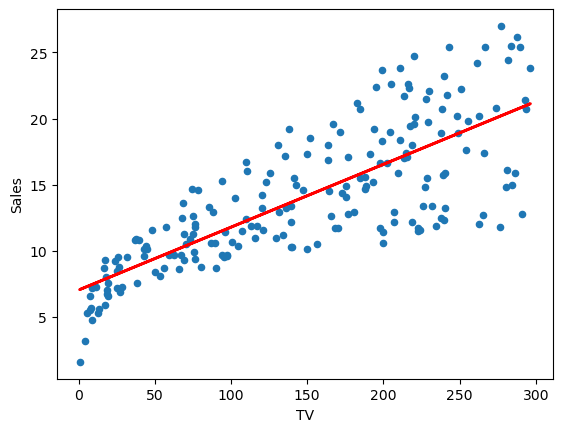

In [21]:
data.plot(kind = "scatter", x = "TV", y = "Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c = "red", linewidth = 2)

In [22]:
lm.predict()

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [23]:
data["sales_pred"] = lm.predict()

In [24]:
data.head()

,TV,Radio,Newspaper,Sales,sales_pred
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218


In [25]:
data["RSE"] = (data["Sales"] - data["sales_pred"])**2

In [26]:
import numpy as np
SSD = sum(data["RSE"])
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656368650462

In [27]:
sales_m = np.mean(data["Sales"])
sales_m

14.0225

In [28]:
RSE/sales_m

0.23238768897489476

23% no explicado por el modelo

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <BarContainer object of 10 artists>)

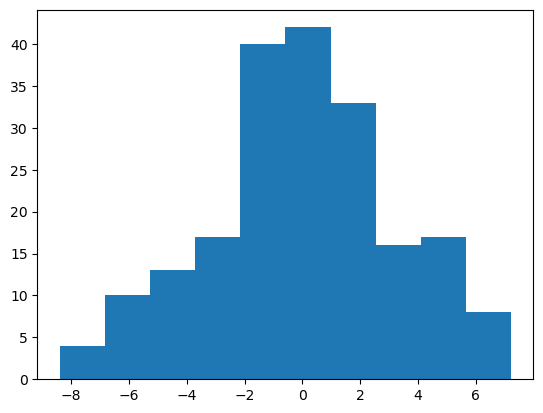

In [29]:
plt.hist(lm.resid)

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <BarContainer object of 10 artists>)

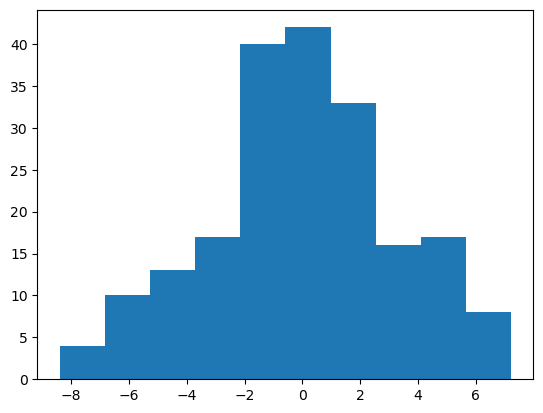

In [30]:
plt.hist(data["Sales"] - data["sales_pred"])

In [36]:
np.sqrt(lm.mse_resid)

3.2586563686504624

## Regresión lineal múltiple en Python
# El paquete statsmodel para regresión múltiple

* Sales ~ TV
* Sales ~ Newspaper
* Sales ~ Radio
* Sales ~ TV + Newspaper
* Sales ~ TV + Radio
* Sales ~ Newspaper + Radio
* Sales ~ TV + Newspaper + Radio

En total 2**N - 1 modelos con N predictores


In [37]:
# Añadir Newspaper al modelo existente
lm2 = smf.ols(formula = "Sales~TV+Newspaper", data = data).fit()

In [38]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [39]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948 + 0.046901*TV + 0.044219*Newspaper

In [41]:
lm2.rsquared

0.6458354938293271

In [42]:
lm2.rsquared_adj

0.6422399150864777

In [43]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])

In [44]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [45]:
SSERROR =sum( (data["Sales"] - sales_pred)**2 )

In [46]:
SSERROR

1918.561811896827

In [52]:
RSE = np.sqrt(SSERROR/(len(data)-2-1))
RSE

3.120719860252885

In [53]:
np.sqrt(lm2.mse_resid)

3.120719860252886

In [54]:
RSE/sales_m

0.2225508903728212

Deja de explicar 22.25% del modelo

In [56]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           3.95e-45
Time:                        21:58:10   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Añadir Radio al modelo existente
lm3 = smf.ols(formula = "Sales~TV+Radio", data = data).fit()

In [60]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           4.83e-98
Time:                        22:01:58   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSERROR =sum( (data["Sales"] - sales_pred)**2 )
RSE = np.sqrt(SSERROR/(len(data)-2-1))
SSERROR, RSE, RSE/sales_m

(556.9139800676182, 1.681360912508001, 0.1199045043685506)

El modelo no explica el 12% de los datos

In [64]:
# Añadir Newspaper al modelo existente
lm4 = smf.ols(formula = "Sales~TV+Radio+ Newspaper", data = data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        22:06:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
sales_pred = lm4.predict(data[["TV", "Radio", "Newspaper"]])
SSERROR =sum( (data["Sales"] - sales_pred)**2 )
RSE = np.sqrt(SSERROR/(len(data)-3-1))
SSERROR, RSE, RSE/sales_m

(556.8252629021873, 1.6855103734147443, 0.12020041885646242)

El modelo no explica em 12.02% de los datos

Este modelo es peor que el anterior

## Multicolinealidad

In [67]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [68]:
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


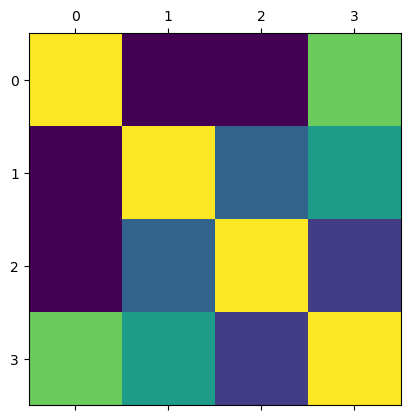

In [69]:
plt.matshow(data_ads.corr())

In [70]:
# Newspaper ~ TV + Radio -> R**2  y VIF = 1/(1-R**2)

In [71]:
# Radio ~ TV + Newspaper -> R**2 y VIF = 1/(1-R**2)

In [73]:
# TV ~ Radio + Newspaper -> R**2 y VIF = 1/(1-R**2)

In [75]:
# Si VIF>5, las variables son altamente correlacionadas

In [80]:
lm_n = smf.ols(formula = "Newspaper~TV+Radio", data = data_ads).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [81]:
lm_tv = smf.ols(formula = "TV~Newspaper+Radio", data = data_ads).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

TV no correlacionada con los demás

In [83]:
lm_r = smf.ols(formula = "Radio~Newspaper+TV", data = data_ads).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

# Validando el modelo

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../datasets/ads/Advertising.csv")

## Dividir el data set en conjuntos de entrenamiento y testing

In [86]:
a = np.random.randn(len(data))

Text(0.5, 0, 'Valores de una distribución normal estándar')

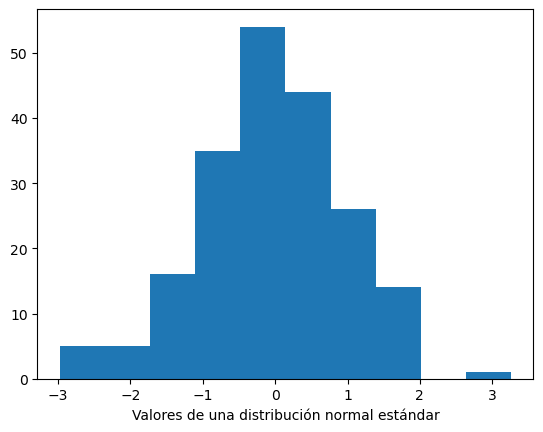

In [88]:
plt.hist(a)
plt.xlabel("Valores de una distribución normal estándar")

In [95]:
check = (a<0.8) #80% de los datos son de entrenamiento
training = data[check]
testing = data[~check]

In [96]:
len(training) + len(testing)

200

In [97]:
len(training) , len(testing)

(160, 40)

In [99]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "Sales~TV+Radio", data = training).fit()

In [100]:
lm.params

Intercept    2.948781
TV           0.045186
Radio        0.189178
dtype: float64

In [101]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     745.4
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           7.13e-81
Time:                        22:55:04   Log-Likelihood:                -302.47
No. Observations:                 160   AIC:                             610.9
Df Residuals:                     157   BIC:                             620.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9488      0.315      9.364      0.000       2.327       3.571
TV             0.0452      0.001     30.637      0.000       0.042       0.048
Radio          0.1892      0.009     22.033      0.000       0.172       0.206
==============================================================================
Omnibus:                       17.109   Durbin-Watson:                   2.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.446
Skew:                          -0.841   Prob(JB):                     5.99e-05
Kurtosis:                       3.294   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Validación del modelo con el conjunto de testing

In [102]:
sales_pred = lm.predict(testing)

In [103]:
sales_pred

6      11.752012
7      12.088031
17     23.155581
18      9.953802
21     14.640761
22      6.553164
23     16.461865
24      8.147514
27     16.957226
29      9.165762
32      7.624634
39     20.383207
44      8.944821
47     21.639797
51      9.301569
52     20.615760
66      9.025916
69     21.050026
73      9.874172
74     17.245262
83     14.457920
85     15.159601
89     16.952910
91      4.524870
116    11.943925
122    13.524488
128    22.172984
130    10.471852
136    11.483478
138     9.791487
139    19.608590
143     8.753558
152    16.285391
153    18.199513
171    14.335705
173    11.901278
187    17.013242
188    18.501568
194    16.447865
197    12.706069
dtype: float64

In [104]:
SSERROR = sum((testing["Sales"]-sales_pred)**2)
SSERROR

146.7465149808008

In [105]:
RSE = np.sqrt(SSERROR/(len(testing)-2-1))
RSE

1.991512497201092

In [106]:
RSE/np.mean(testing["Sales"])

0.1411169174278896

El modelo deja de explicar el 14% de los datos

El modelo generaliza medianamente bien con el conjunto de testing. No hay overfitting

In [107]:
from IPython.display import Image

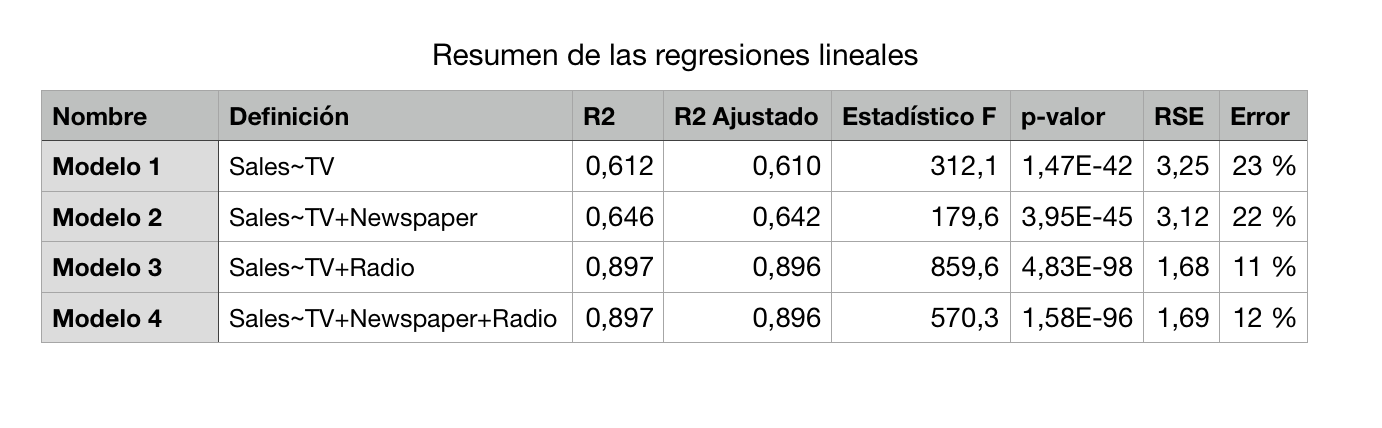

In [108]:
Image(filename = "resources/summary-lm.png")

## Regresión lineal con scikit-learn y selección de rasgos

In [110]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as np
import numpy as np

In [111]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [112]:
feature_cols = ["TV", "Radio", "Newspaper"]

In [121]:
x = data[feature_cols]
y = data["Sales"]

In [123]:
estimator = SVR(kernel="linear")
selector = RFE(estimator,n_features_to_select= 2, step=1)
selector = selector.fit(x,y)

In [124]:
selector.support_

array([ True,  True, False])

In [125]:
selector.ranking_

array([1, 1, 2])

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
x_pred = x[["TV", "Radio"]]

In [128]:
x_pred

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [129]:
lm = LinearRegression()
lm.fit(x_pred,y)

LinearRegression()

In [130]:
lm.coef_

array([0.04575482, 0.18799423])

In [133]:
lm.score(x_pred,y) #R2 ajustado

0.8971942610828956

## Variables categóricas

In [145]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [146]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [147]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [148]:
dummy_gender = pd.get_dummies(df["Gender"], prefix ="Gender")
dummy_gender

,Gender_Female,Gender_Male
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
2357,False,True
2358,False,True
2359,True,False
2360,True,False


In [149]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix ="City")
dummy_city_tier

,City_Tier 1,City_Tier 2,City_Tier 3
0,True,False,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,True,False
...,...,...,...
2357,False,True,False
2358,False,True,False
2359,False,False,True
2360,True,False,False


In [150]:
columns_names = df.columns.values.tolist()
columns_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [151]:
df_new = df[columns_names].join(dummy_gender)
columns_names = df_new.columns.values.tolist()
columns_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male']

In [152]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False


In [154]:
df_new = df_new[columns_names].join(dummy_city_tier)

In [155]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False


In [156]:
columns_names = df_new.columns.values.tolist()
columns_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3']

In [157]:
feature_cols = ['Monthly Income','Transaction Time',
 'Gender_Female',
 'Gender_Male', 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3']

In [158]:
feature_cols

['Monthly Income',
 'Transaction Time',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3']

In [159]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [160]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [161]:
lm.intercept_

3655.7294076906524

In [163]:
lm.coef_

array([   0.15297825,    0.12372609,  -94.15779883,   94.15779883,
        119.6632516 ,  -16.67901801, -102.9842336 ])

In [165]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1529782460932052),
 ('Transaction Time', 0.12372608642619992),
 ('Gender_Female', -94.15779883032029),
 ('Gender_Male', 94.1577988303202),
 ('City_Tier 1', 119.66325160390095),
 ('City_Tier 2', -16.679018007990212),
 ('City_Tier 3', -102.98423359591068)]

In [166]:
lm.score(X,Y) #R2

0.19478920552885381

In [196]:
feature_cols = ['Monthly Income','Transaction Time',
 'Gender_Female',
 'Gender_Male', 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3', 'Record']

In [197]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [198]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [199]:
lm.intercept_

-79.41713030137362

In [200]:
lm.coef_

array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
        7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02])

In [201]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589748),
 ('Gender_Female', -131.0250132555464),
 ('Gender_Male', 131.02501325554647),
 ('City_Tier 1', 76.76432601049521),
 ('City_Tier 2', 55.13897430923261),
 ('City_Tier 3', -131.90330031972772),
 ('Record', 772.2334457445644)]

In [202]:
lm.score(X,Y) #R2

0.9179923586131016

In [203]:
feature_cols = ['Monthly Income','Transaction Time',
 'Gender_Female',
 'Gender_Male', 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3', 'Record', 'Age ']

In [204]:
feature_cols

['Monthly Income',
 'Transaction Time',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3',
 'Record',
 'Age ']

In [205]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [206]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [207]:
lm.intercept_

-335.73800174537973

In [208]:
lm.coef_

array([ 1.47442269e-01,  1.56391583e-01, -1.33088707e+02,  1.33088707e+02,
        7.83785050e+01,  5.20259633e+01, -1.30404468e+02,  7.72149205e+02,
        6.42429817e+00])

In [209]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14744226897448567),
 ('Transaction Time', 0.1563915830636602),
 ('Gender_Female', -133.08870663170637),
 ('Gender_Male', 133.0887066317059),
 ('City_Tier 1', 78.37850497640346),
 ('City_Tier 2', 52.02596334431926),
 ('City_Tier 3', -130.4044683207227),
 ('Record', 772.1492053631353),
 ('Age ', 6.424298167613236)]

In [210]:
lm.score(X,Y) #R2

0.9187458997709432

Mejor modelo es el anterior

In [211]:
feature_cols = ['Monthly Income','Transaction Time',
 'Gender_Female',
 'Gender_Male', 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3', 'Record']

In [212]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)
lm.intercept_

-79.41713030137362

In [213]:
lm.coef_

array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
        7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02])

In [214]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589748),
 ('Gender_Female', -131.0250132555464),
 ('Gender_Male', 131.02501325554647),
 ('City_Tier 1', 76.76432601049521),
 ('City_Tier 2', 55.13897430923261),
 ('City_Tier 3', -131.90330031972772),
 ('Record', 772.2334457445644)]

In [222]:
lm.score(X,Y) #R2

0.9179923586131016

In [230]:
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income']*0.14753898049205744+df_new['Transaction Time']*0.15494612549589748+df_new['Gender_Female']*-131.0250132555464+df_new['Gender_Male']*131.02501325554647+df_new['City_Tier 1']*76.76432601049521+df_new['City_Tier 2']*55.13897430923261+df_new['City_Tier 3']*-131.90330031972772+df_new['Record']*772.2334457445644

El modelo se puede escribir como:

Total Spend = -79.41713030137362 + 'Monthly Income'*0.14753898049205744+'Transaction Time'*0.15494612549589748+'Gender_Female'*-131.0250132555464+Gender_Male'*131.02501325554647+'City_Tier 1'*76.76432601049521+'City_Tier 2'*55.13897430923261+'City_Tier 3'*-131.90330031972772+'Record'*772.2334457445644

* Si es hombre y vive en CT1:

Total Spend = -79.41713030137362 + 'Monthly Income'*0.14753898049205744 + 'Transaction Time'*0.15494612549589748 + 131.02501325554647 + 76.76432601049521 + 'Record'*772.2334457445644

* Si es hombre y vive en CT2

Total Spend = -79.41713030137362 + 'Monthly Income'*0.14753898049205744+'Transaction Time'*0.15494612549589748 + 131.02501325554647 + 55.13897430923261+'Record'*772.2334457445644

* Si es hombre y vive en CT3

Total Spend = -79.41713030137362 + 'Monthly Income'*0.14753898049205744+'Transaction Time'*0.15494612549589748 + 131.02501325554647+ -131.90330031972772 +'Record'*772.2334457445644

* Si es mujer y vive en CT1:

Total Spend = -79.41713030137362 + 'Monthly Income'*0.14753898049205744 + 'Transaction Time'*0.15494612549589748 - 131.02501325554647 + 76.76432601049521 + 'Record'*772.2334457445644

* Si es mujer y vive en CT2

Total Spend = -79.41713030137362 + 'Monthly Income'*0.14753898049205744+'Transaction Time'*0.15494612549589748 - 131.02501325554647 + 55.13897430923261+'Record'*772.2334457445644

* Si es mujer y vive en CT3

Total Spend = -79.41713030137362 + 'Monthly Income'*0.14753898049205744+'Transaction Time'*0.15494612549589748 - 131.02501325554647+ -131.90330031972772 +'Record'*772.2334457445644

In [231]:
df_new["prediction"]

0       4903.696720
1       4799.434826
2       5157.082504
3       8068.012996
4       3581.980335
           ...     
2357    3336.456655
2358    8069.348522
2359    9050.690358
2360    8220.596094
2361    6814.313090
Name: prediction, Length: 2362, dtype: float64

In [229]:
lm.predict(X)

array([4903.69671986, 4799.4348257 , 5157.08250392, ..., 9050.6903581 ,
       8220.59609399, 6814.31308959])

In [232]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False,3581.980335


In [237]:
SSERROR = np.sum((df_new["prediction"]-df_new["Total Spend"])**2)
SSERROR

1517733985.3408165

In [238]:
RSE = np.sqrt(SSERROR/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818166

In [239]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976715

In [240]:
RSE/sales_mean

0.1303113568029416

El modelo no explica el 13% de los datos

## Eliminar variables dummy redundantes

El cambio redunda en los coeficientes beta 0

In [251]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")

In [252]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False


In [253]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,False
1,False
2,True
3,False
4,False


In [254]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,False,False
1,True,False
2,True,False
3,False,False
4,True,False


In [263]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")
columns_names = df.columns.values.tolist()
df_new = df[columns_names].join(dummy_gender)
columns_names = df_new.columns.values.tolist()
df_new = df_new[columns_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,False,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,True,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,False,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,False,True,False


In [264]:
feature_cols = ['Monthly Income','Transaction Time',
 'Gender_Male', 
 'City_Tier 2',
 'City_Tier 3', 'Record']

In [265]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [266]:
print(lm.intercept_)

-133.67781754642328


In [267]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Male', 262.05002651109436),
 ('City_Tier 2', -21.6253517012628),
 ('City_Tier 3', -208.66762633022327),
 ('Record', 772.233445744564)]

In [269]:
lm.score(X,Y) #R2

0.9179923586131016

* El coeficiente  de 'Gender_Male' = 262.05002651109436 se interpreta como el del hombre que vive en CT1:
(Gender_Male = 1, CT_2 = 0, CT_3=0)
* El coeficiente  de 'Gender_Male' = 262.05002651109436 se interpreta como el del hombre que vive en CT2:
(Gender_Male = 1, CT_2 = 1, CT_3=0)
* El coeficiente  de 'Gender_Male' = 262.05002651109436 se interpreta como el del hombre que vive en CT3:
(Gender_Male = 1, CT_2 = 0, CT_3=1)
* El coeficiente  de 'Gender_Male' = 262.05002651109436 se interpreta como el de la mujer que vive en CT1:
(Gender_Male = 0, CT_2 = 0, CT_3=0)
* El coeficiente  de 'Gender_Male' = 262.05002651109436 se interpreta como el de la mujer que vive en CT2:
(Gender_Male = 0, CT_2 = 1, CT_3=0)
* El coeficiente  de 'Gender_Male' = 262.05002651109436 se interpreta como el de la mujer que vive en CT3:
(Gender_Male = 0, CT_2 = 0, CT_3=1)



Coeficientes con todas las variables del modelo:

* Intercept: -79.41713030137362
* 'Monthly Income', 0.14753898049205744),
* 'Transaction Time', 0.15494612549589748),
* 'Gender_Female', -131.0250132555464),
* 'Gender_Male', 131.02501325554647),
* 'City_Tier 1', 76.76432601049521),
* 'City_Tier 2', 55.13897430923261),
* 'City_Tier 3', -131.90330031972772),
* 'Record', 772.2334457445644)]

 Coeficientes con variables simplificadas:

* Intercept: -133.67781754642328
* 'Monthly Income', 0.14753898049205744),
* 'Transaction Time', 0.15494612549589704),
* 'Gender_Male', 262.05002651109436),
* 'City_Tier 2', -21.6253517012628),
* 'City_Tier 3', -208.66762633022327),
* 'Record', 772.233445744564)]



In [276]:
-79.41713030137362 +  131.02501325554647 + 76.76432601049521 #Gender male CT1, modelo todas

128.37220896466806

In [277]:
-133.67781754642328 + 262.05002651109436 # modelo simplificado Gender male CT1

128.37220896467107

In [278]:
-79.41713030137362 -131.0250132555464 + 76.76432601049521 #Gender female CT1, modelo todas

-133.67781754642482

In [279]:
-133.67781754642328  # modelo simplificado Gender female CT1

-133.67781754642328

## Transformación de variables para conseguir una relación lineal

In [280]:
import pandas as pd

In [281]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [282]:
data_auto.shape

(406, 9)

In [283]:
import matplotlib.pyplot as plt

In [285]:
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()

Text(0.5, 1.0, 'hp vs mpg')

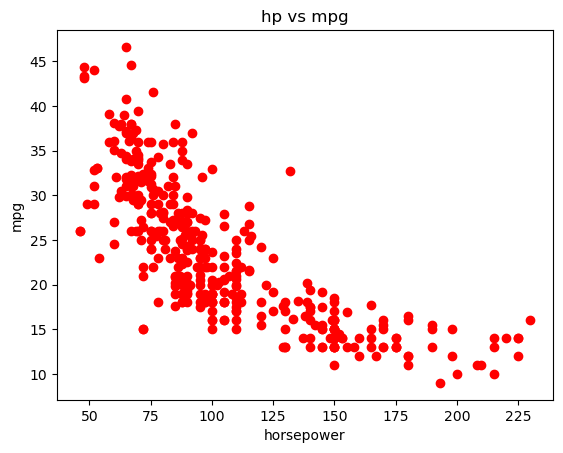

In [288]:
plt.plot(data_auto["horsepower"],data_auto["mpg"], "ro")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.title("hp vs mpg")

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [335]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

In [336]:
( len(X), len(Y))

(406, 406)

In [337]:
X = pd.DataFrame(list(X), columns=['Numbers'])
X

,Numbers
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
401,86.0
402,52.0
403,84.0
404,79.0


In [338]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

Text(0.5, 1.0, 'hp vs mpg')

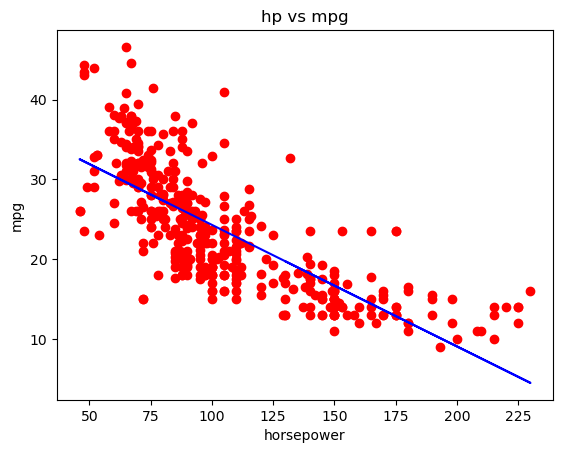

In [341]:
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color = "blue")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.title("hp vs mpg")

In [342]:
lm.score(X,Y) #R2

0.5746533406450252

In [343]:
SSD = np.sum((Y-lm.predict(X))**2)

In [345]:
RSE = np.sqrt(SSD/len(X-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error

(10315.751960060918,
 5.0406602800886455,
 23.514572864321607,
 0.2143632507880584)

In [ ]:
## Modelo de regresión cuadrático
* mpg = a + b * horsepower**2

In [346]:
X = X**2

In [348]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [349]:
lm.score(X,Y) #R2

0.4849887034823205

In [350]:
RSE = np.sqrt(SSD/len(X-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error

(10315.751960060918,
 5.0406602800886455,
 23.514572864321607,
 0.2143632507880584)

## Modelo de regresión lineal y cuadrático
* mpg = a + b * horsepower + c*horsepower**2

In [363]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [364]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

In [365]:
X = pd.DataFrame(list(X), columns=['Numbers'])
X

,Numbers
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
401,86.0
402,52.0
403,84.0
404,79.0


In [366]:
poly = PolynomialFeatures(degree = 2)

In [367]:
X = poly.fit_transform(X)

In [368]:
X

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [369]:
lm = linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [370]:
lm.score(X,Y)

0.6439066584257469

In [371]:
lm.intercept_

55.026192447081144

In [372]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

El modelos es: mpg = 55.026192447081144 -0.43404318 * hp + 0.00112615 * hp ** 2

In [376]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X = pd.DataFrame(list(X), columns=['Numbers'])
X

,Numbers
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
401,86.0
402,52.0
403,84.0
404,79.0


In [382]:
for d in range(2,6):
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(X)
    lm = linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print("regresión de grado " + str(d))
    print(lm.score(X_data,Y))
    print(lm.intercept_)
    print(lm.coef_)
    

regresión de grado 2
0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
regresión de grado 3
0.6444678885560744
58.44877411167194
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
regresión de grado 4
0.6467674189704502
40.09664386281642
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
regresión de grado 5
0.6547512491822047
-40.69399206172342
[ 0.00000000e+00  4.00021892e+00 -7.54802465e-02  6.19621639e-04
 -2.36220984e-06  3.41983064e-09]


In [392]:
def reg_validation(lm, X_data, Y):
    SSD = np.sum((Y-lm.predict(X_data))**2)
    RSE = np.sqrt(SSD/len(X_data-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print ("SSD: " + str(SSD) + " RSE: " + str(RSE) + " y mean: " + str(y_mean) + " errror: " + str(error))
    #return SSD, RSE, y_mean, error

In [393]:
for d in range(2,6):
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(X)
    lm = linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print("regresión de grado " + str(d))
    print(lm.score(X_data,Y))
    print(lm.intercept_)
    print(lm.coef_)
    reg_validation(lm, X_data,Y)

regresión de grado 2
0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502RSE: 4.612090729309274y mean: 23.514572864321607errror: 0.19613755078269554
regresión de grado 3
0.6444678885560744
58.44877411167194
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.569367428549RSE: 4.608454793615684y mean: 23.514572864321607errror: 0.1959829260010944
regresión de grado 4
0.6467674189704502
40.09664386281642
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491351RSE: 4.593527206652265y mean: 23.514572864321607errror: 0.19534810320207735
regresión de grado 5
0.6547512491822047
-40.69399206172342
[ 0.00000000e+00  4.00021892e+00 -7.54802465e-02  6.19621639e-04
 -2.36220984e-06  3.41983064e-09]
SSD: 8373.171387682132RSE: 4.541318624200213y mean: 23.514572864321607errror: 0.1931278382305087
